In [1]:
%config Completer.use_jedi = False

In [9]:
import sys
sys.path.append("../../utils/")

In [12]:
import pandas as pd
import folium
import viz
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [3]:
train_data_path = "../data/train.csv"
train = pd.read_csv(train_data_path)

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Questions:-

   - How many records are there? 
   - What is the region from where the records are sampled?
   - Are all the regions sampled uniformly?
   - What is the time period from which the records have been sampled?
   - What is are the types of houses (area, number of bedrooms) and the number of data in the dataset?
   - What is the year built and its correlation to change in  current price?
   - Does having any other feature (pool, porch, fireplace) change the price of the house significantly? [How much does having the feature change the price from not having this feature]

> #### Records
----

In [5]:
len(train)

1460

> #### Areas
-----

In [6]:
neighborhoods = list(set(train["Neighborhood"].tolist()))

neighborhood_names = {
    "Blmngtn": "Bloomington Heights",
    "Blueste": "Bluestem",
    "BrDale": "Briardale",
    "BrkSide": "Brookside",
    "ClearCr": "Clear Creek",
    "CollgCr": "College Creek",
    "Crawfor": "Crawford",
    "Edwards": "Edwards",
    "Gilbert": "Gilbert",
    "IDOTRR": "Iowa DOT and Rail Road",
    "MeadowV": "Meadow Village",
    "Mitchel": "Mitchell",
    "Names": "North Ames",
    "NoRidge": "Northridge",
    "NPkVill": "Northpark Villa",
    "NridgHt": "Northridge Heights",
    "NWAmes": "Northwest Ames",
    "OldTown": "Old Town",
    "SWISU": "South & West of Iowa State University",
    "Sawyer": "Sawyer",
    "SawyerW": "Sawyer West",
    "Somerst": "Somerset",
    "StoneBr": "Stone Brook",
    "Timber": "Timberland",
    "Veenker": "Veenker"
}

In [7]:
# m = folium.Map(location=[42.0308, -93.6319])
# m

In [15]:
set(train["YrSold"].tolist())

{2006, 2007, 2008, 2009, 2010}

../../utils/viz.py:97: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(X_, rotation=90, ha="right", fontsize=11)


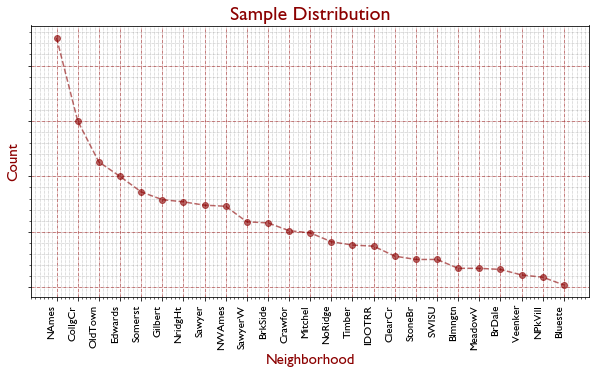

In [14]:
df = train.groupby("Neighborhood").agg({
    "Id":"count",
    "SalePrice":"mean"
})#.size().reset_index(name="Count")
df.sort_values(by="Count", ascending=False, inplace=True)

f, axe = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
viz.plot(df["Neighborhood"], 
         df["Count"], 
         ax=axe,
         title="Sample Distribution",
         xlabel="Neighborhood",
         ylabel="Count", 
         ls="--", 
         marker="o", 
         color="darkred")